In [106]:
import pandas as pd
import numpy as np

In [107]:
allData = pd.read_csv("CreditData.csv")
allData.head()

,Status,Duration,history,Purpose,amount,Savings,employment,Installment,sex,guarantors,...,Property,Age,OtherInstallment,Housing,ExistingCredits,Job,liable,Telephone,foreign,Approved
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,Yes
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,No
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,Yes
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,Yes
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,No


In [108]:
print('uniue values of the target attribute (Approved):', allData.Approved.unique())

# create a new column for target attribute
allData['Approved_val'] = allData['Approved']
# manually assessing 1/0 to Yes/No
# note that we use a different method than LAB 4
allData['Approved_val'] = allData['Approved_val'].map({'Yes': 1, 'No': 0})

uniue values of the target attribute (Approved): ['Yes' 'No']


In [109]:
allData['Status_val'] = allData['Status']
allData['history_val'] = allData['history']
allData['Savings_val'] = allData['Savings']
allData['employment_val'] = allData['employment']
allData['guarantors_val'] = allData['guarantors']
allData['Property_val'] = allData['Property']
allData['OtherInstallment_val'] = allData['OtherInstallment']
allData['Housing_val'] = allData['Housing']
allData['Job_val'] = allData['Job']
#allData['Telephone_val'] = allData['Telephone']
allData['foreign_val'] = allData['foreign'] #might be one hot encoding

In [110]:
allData['Status_val'] = allData['Status_val'].map({'A11': 1, 'A12': 2, 'A13': 3, 'A14': 0})
allData['history_val'] = allData['history_val'].map({'A30': 0, 'A31': 0, 'A32': 1, 'A33': 2, 'A34': 3})
allData['Savings_val'] = allData['Savings_val'].map({'A61': 1, 'A62': 2, 'A63': 3, 'A64': 4, 'A65': 0})
allData['employment_val'] = allData['employment_val'].map({'A71': 0, 'A72': 1, 'A73': 2, 'A74': 3, 'A75': 4})
allData['guarantors_val'] = allData['guarantors_val'].map({'A101': 0, 'A102': 1, 'A103': 2})
allData['Property_val'] = allData['Property_val'].map({'A121': 3, 'A122': 2, 'A123': 1, 'A124': 0})
allData['OtherInstallment_val'] = allData['OtherInstallment'].map({'A141': 0, 'A142': 1, 'A143': 2})
allData['Housing_val'] = allData['Housing_val'].map({'A151': 1, 'A152': 2, 'A153': 0})
allData['Job_val'] = allData['Job_val'].map({'A171': 0, 'A172': 1, 'A173': 2, 'A174': 3})
#allData['Telephone_val'] = allData['Telephone_val'].map({'A191': 0, 'A192': 1})
allData['foreign_val'] = allData['foreign_val'].map({'A201': 0, 'A202': 1})

In [111]:
allData = pd.get_dummies(allData, columns=['Purpose'])

In [112]:
allData = pd.get_dummies(allData, columns=['sex'])

In [113]:
#allData = pd.get_dummies(allData, columns=['guarantors'])

In [114]:
#allData = pd.get_dummies(allData, columns=['Property'])

In [115]:
#allData = pd.get_dummies(allData, columns=['OtherInstallment'])

In [116]:
allData = pd.get_dummies(allData, columns=['Telephone'])

In [117]:
#allData = pd.get_dummies(allData, columns=['foreign'])

In [118]:
allData.head()

,Status,Duration,history,amount,Savings,employment,Installment,guarantors,residence,Property,...,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,sex_A91,sex_A92,sex_A93,sex_A94,Telephone_A191,Telephone_A192
0,A11,6,A34,1169,A65,A75,4,A101,4,A121,...,0,0,0,0,0,0,1,0,0,1
1,A12,48,A32,5951,A61,A73,2,A101,2,A121,...,0,0,0,0,0,1,0,0,1,0
2,A14,12,A34,2096,A61,A74,2,A101,3,A121,...,0,1,0,0,0,0,1,0,1,0
3,A11,42,A32,7882,A61,A74,2,A103,4,A122,...,0,0,0,0,0,0,1,0,1,0
4,A11,24,A33,4870,A61,A73,3,A101,4,A124,...,0,0,0,0,0,0,1,0,1,0


In [119]:
allData.columns

Index(['Status', 'Duration', 'history', 'amount', 'Savings', 'employment',
       'Installment', 'guarantors', 'residence', 'Property', 'Age',
       'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'liable',
       'foreign', 'Approved', 'Approved_val', 'Status_val', 'history_val',
       'Savings_val', 'employment_val', 'guarantors_val', 'Property_val',
       'OtherInstallment_val', 'Housing_val', 'Job_val', 'foreign_val',
       'Purpose_A40', 'Purpose_A41', 'Purpose_A410', 'Purpose_A42',
       'Purpose_A43', 'Purpose_A44', 'Purpose_A45', 'Purpose_A46',
       'Purpose_A48', 'Purpose_A49', 'sex_A91', 'sex_A92', 'sex_A93',
       'sex_A94', 'Telephone_A191', 'Telephone_A192'],
      dtype='object')

In [120]:
# splitting the data into train and test sets
from sklearn.model_selection import train_test_split

all_y = allData['Approved_val']
all_X = allData[['Duration', 'amount', 'Installment', 'residence', 'Age', 'ExistingCredits', 'liable',
                 'Status_val', 'history_val', 'Savings_val',
                 'employment_val', 'guarantors_val', 'Property_val',
                 'OtherInstallment_val',
                 'Housing_val', 'Job_val',
                 #'Telephone_val',
                 'foreign_val',
                 'Purpose_A40', 'Purpose_A41', 'Purpose_A410', 'Purpose_A42', 'Purpose_A43', 'Purpose_A44',
                 'Purpose_A45', 'Purpose_A46', 'Purpose_A48', 'Purpose_A49',
                 'sex_A91', 'sex_A92', 'sex_A93', 'sex_A94',
                 #'OtherInstallment_A141','OtherInstallment_A142', 'OtherInstallment_A143',
                 #'Property_A121','Property_A122', 'Property_A123', 'Property_A124',
                 'Telephone_A191', 'Telephone_A192'
                 #'foreign_A201', 'foreign_A202'
                 ]]

# 80% training set and 20% test set
train_X, test_X, train_y, test_y = train_test_split(all_X, all_y , test_size=0.2, random_state=42)

print('length of train:', len(train_X))
print('length of test:', len(test_X))

length of train: 800
length of test: 200


In [121]:
from sklearn import tree
tree1 = tree.DecisionTreeClassifier()
tree1.fit(train_X, train_y)

DecisionTreeClassifier()

In [122]:
predictions = tree1.predict(test_X)

from sklearn.metrics import accuracy_score
print(accuracy_score(test_y, predictions))

0.715


[Text(0.43045660621761656, 0.975, 'x[7] <= 0.5\ngini = 0.421\nsamples = 800\nvalue = [241, 559]'),
 Text(0.18404576856649396, 0.925, 'x[13] <= 1.5\ngini = 0.231\nsamples = 323\nvalue = [43, 280]'),
 Text(0.08808290155440414, 0.875, 'x[10] <= 2.5\ngini = 0.44\nsamples = 55\nvalue = [18, 37]'),
 Text(0.055267702936096716, 0.825, 'x[26] <= 0.5\ngini = 0.499\nsamples = 27\nvalue = [13, 14]'),
 Text(0.03454231433506045, 0.775, 'x[0] <= 29.0\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.013816925734024179, 0.725, 'x[2] <= 1.5\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.0069084628670120895, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.02072538860103627, 0.675, 'x[4] <= 26.0\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.013816925734024179, 0.625, 'x[12] <= 2.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0069084628670120895, 0.575, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.02072538860103627, 0.575, 'gini = 0.0\nsamples = 1\nvalue = 

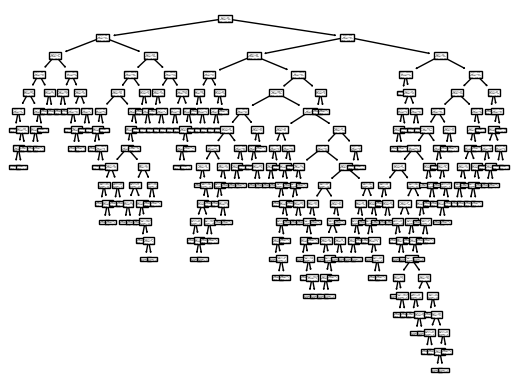

In [93]:
# now we plot the tree
tree.plot_tree(tree1)

In [94]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()

# build a logstic regression model using three attributes
lm.fit(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
# get parameters of regression

# we use three attributes to build the model, hence we have three weights
print("weights of the model are:", lm.coef_)

print("intercept of the model is:", lm.intercept_)

weights of the model are: [[-3.94891198e-02 -4.68087702e-05 -2.60986569e-01 -8.21127814e-02
   3.04657036e-02 -1.12987021e-01 -3.15059407e-02 -4.04325890e-01
   5.05847283e-01  7.66869960e-02  2.17561553e-01  7.76094479e-02
   2.19031002e-01  2.50446839e-01  2.60976226e-01 -3.19875062e-02
   5.23320571e-02 -3.09497741e-01  1.87213325e-01 -4.43100991e-03
   1.65352150e-02  2.46305833e-01 -8.49967003e-03 -1.62597631e-02
  -9.86461498e-02  1.47568421e-02 -2.33296921e-02 -6.05223277e-02
  -1.25046198e-01  1.98868909e-01 -9.15319468e-03 -1.14121476e-01
   1.18268664e-01]]
intercept of the model is: [0.00421394]


In [96]:
# predic method predicts the class for the input dataset
# we want to test the performance on test dataset
predicted_classes = lm.predict(test_X)

In [97]:
predicted_classes

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0])

In [98]:
real_classes = test_y.values

In [99]:
real_classes

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1])

In [100]:
accuracy = sum(real_classes == predicted_classes) / len(real_classes)
print("the accuracy of this model is:", accuracy)

the accuracy of this model is: 0.725


In [101]:
print('number of (1) in real_classes is:', sum(real_classes))
print('number of (0) in real_classes is:', (len(real_classes) - sum(real_classes)))

number of (1) in real_classes is: 141
number of (0) in real_classes is: 59


In [102]:
from sklearn.metrics import confusion_matrix
# build the confusion matrix
conf = confusion_matrix(predicted_classes, real_classes, labels=[1,0])
print(conf)

[[124  38]
 [ 17  21]]


In [103]:
accuracy = sum(real_classes == predicted_classes) / len(real_classes)
print("Accuracy:", accuracy)

Accuracy: 0.725


In [104]:
#precision
precision = conf[0][0]/((conf[0][0])+(conf[0][1]))
print("Precision:", precision)

Precision: 0.7654320987654321


In [105]:
#recall
recall = conf[0][0]/((conf[0][0])+(conf[1][0]))
print("Recall:", recall)

Recall: 0.8794326241134752
